In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ***Load the Dataset***

In [ ]:
#import the csv file
df= pd.read_csv('EuropeanBrent.csv',header=0,parse_dates = True)
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9077,"Feb 22, 2023",79.55
9078,"Feb 23, 2023",82.08
9079,"Feb 24, 2023",82.31
9080,"Feb 27, 2023",82.31


# ***EDA***

In [ ]:
df.shape

(9082, 2)

In [ ]:
#change the column names
df.columns=['date', 'price']
df

,date,price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9077,"Feb 22, 2023",79.55
9078,"Feb 23, 2023",82.08
9079,"Feb 24, 2023",82.31
9080,"Feb 27, 2023",82.31


In [ ]:
df.columns

Index(['date', 'price'], dtype='object')

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9081 non-null   object 
 1   price   9081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 142.0+ KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

date     1
price    1
dtype: int64


In [ ]:
df=df.dropna()
df.shape

(9081, 2)

In [ ]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
df.dropna(inplace=True)  # Drop rows with NaN values
df.head()

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
df.nunique()

date     9081
price    5064
dtype: int64

In [ ]:
# To find the relationship
df.corr()

,price
price,1.0


In [ ]:
df['price'].value_counts()

18.48    26
18.15    22
16.85    20
18.63    18
17.00    18
         ..
69.20     1
69.76     1
68.96     1
68.76     1
79.55     1
Name: price, Length: 5064, dtype: int64

In [ ]:
df.describe()

,price
count,9081.000000
mean,48.688842
std,32.877249
min,9.100000
25%,19.080000
50%,39.600000
75%,70.890000
max,143.950000


In [ ]:
#setting the date column as index
df.set_index('date', inplace=True)


# ***Data Visualization***

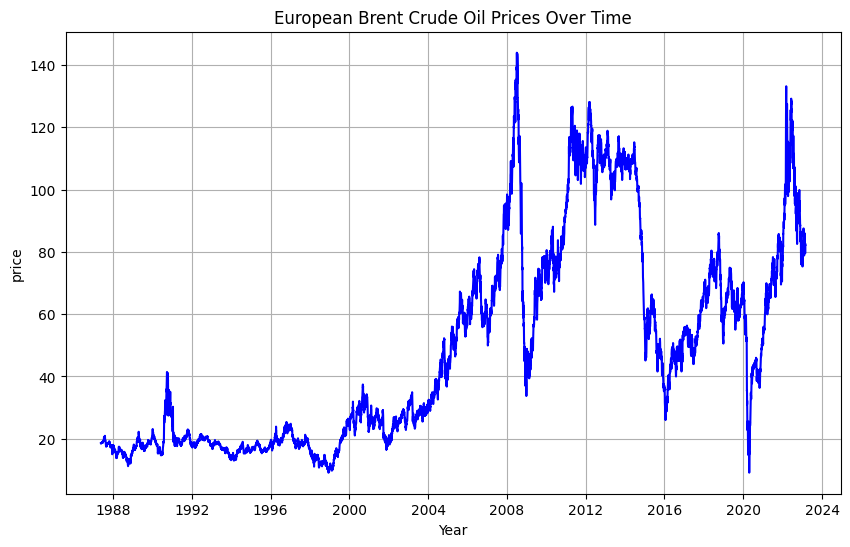

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], color='blue')
plt.title('European Brent Crude Oil Prices Over Time')
plt.xlabel('Year')
plt.ylabel('price')
plt.grid(True)
plt.show()

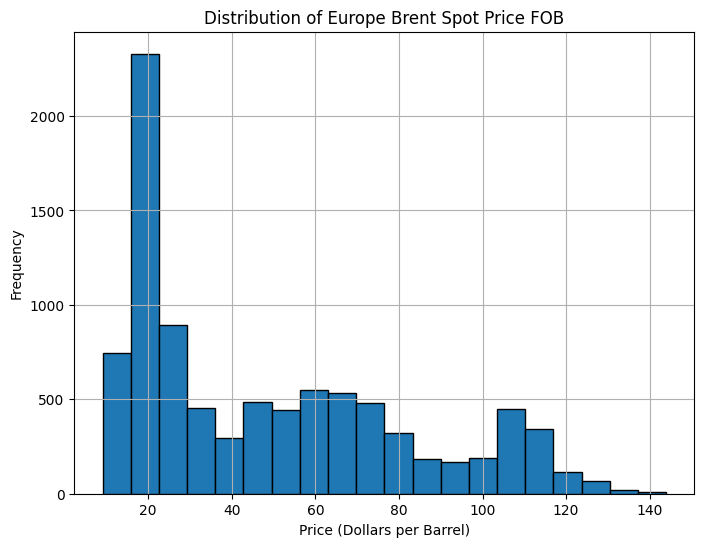

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Europe Brent Spot Price FOB')
plt.xlabel('Price (Dollars per Barrel)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

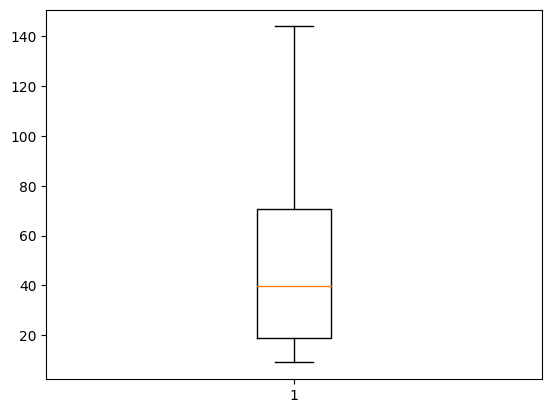

In [ ]:
plt.boxplot(df['price'])
plt.show()

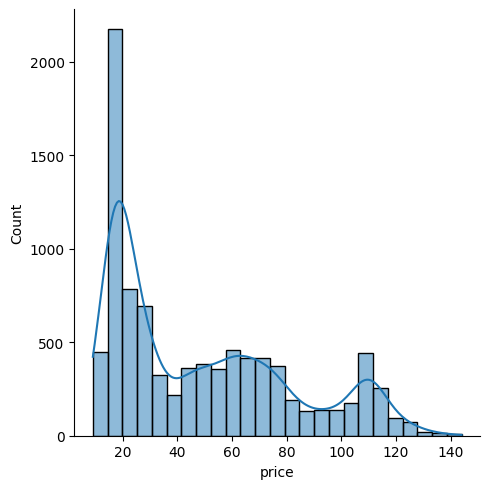

In [ ]:
sns.displot(df['price'] , bins= 25 , kde=True)

# ***Model Building***

# ARIMA
# y(t) = c + ∑(i=1 to p) φ(i) * y(t-i) + ∑(j=1 to q) θ(j) * ε(t-j) + ε(t)
# where:
# y(t) is the current value of the time series
# c is a constant
# φ(i) are the autoregressive coefficients
# θ(j) are the moving average coefficients
# ε(t) is the white noise error term
# p is the order of the autoregressive model
# q is the order of the moving average model

In [ ]:
# Import necessary libraries
from pandas import read_csv
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

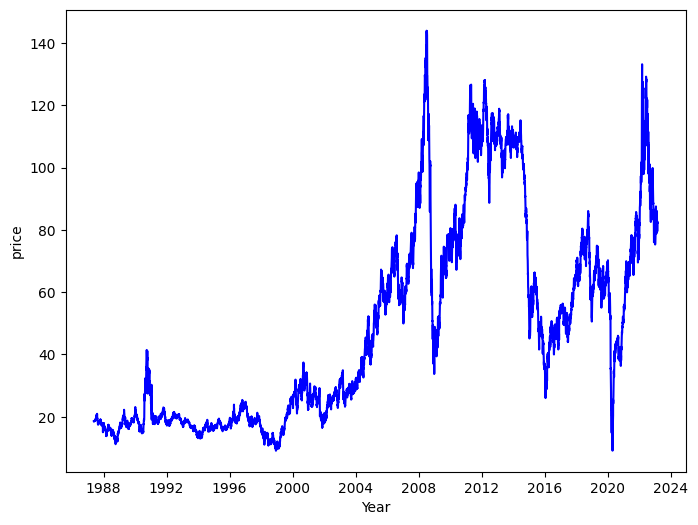

In [ ]:
# Plot the time series data
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['price'], color='blue')
plt.xlabel('Year')
plt.ylabel('price')
plt.show()

In [ ]:
# Check for stationarity
def stationarity_test(Data1):
    result = adfuller(Data1)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

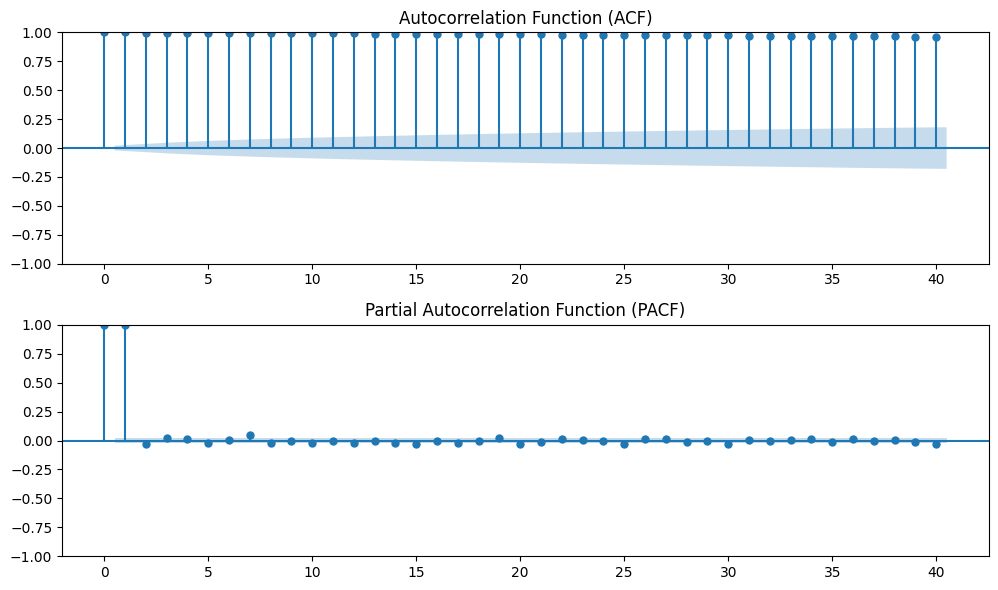

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' is your DataFrame containing the price data
price_data = df['price']

# Plot ACF and PACF for the price data
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# ACF plot
plot_acf(price_data, ax=axes[0])                                            #The x-axis represents the lag (time delay) and the y-axis represents the correlation coefficient values.
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(price_data, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


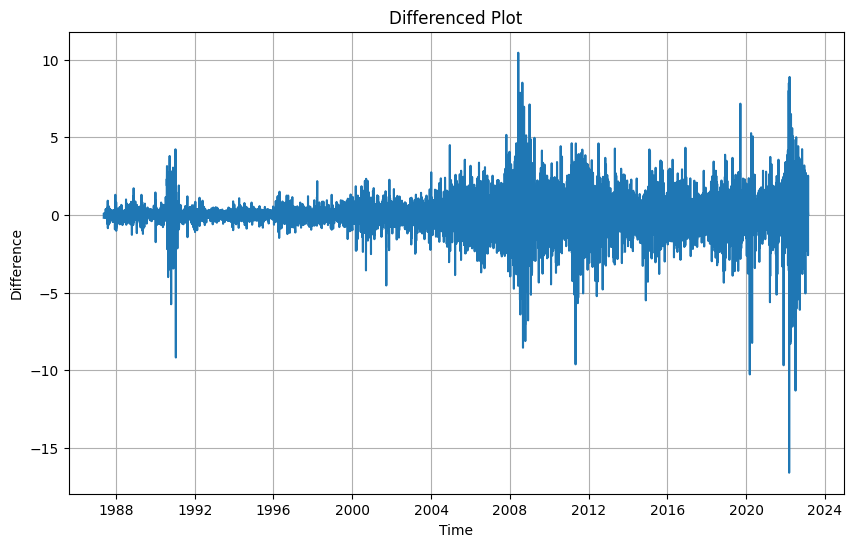

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the price data
price_data = df['price']

# Calculate differences
differenced_data = price_data.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data)
plt.title('Differenced Plot')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.grid(True)
plt.show()


In [ ]:
# Splitting the data
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (7264, 1)
Testing data shape: (1817, 1)


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['price'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29373.989, Time=15.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29394.286, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29387.218, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29386.794, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29392.586, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29386.012, Time=10.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29385.883, Time=9.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29375.700, Time=11.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29375.697, Time=8.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29386.846, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29386.130, Time=3.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29386.370, Time=4.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29377.531, Time=7.64 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=29372.291, Time=5.48 sec
 ARIMA(1,1,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9081
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -14681.145
Date:                Mon, 26 Feb 2024   AIC                          29372.291
Time:                        06:42:19   BIC                          29407.860
Sample:                             0   HQIC                         29384.389
                               - 9081                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0864      0.023     -3.811      0.000      -0.131      -0.042
ar.L2         -0.8941      0.022    -40.988      0.000      -0.937      -0.851
ma.L1          0.1008      0.025      4.089      0.000       0.052       0.149
ma.L2          0.8743      0.024     36.990      0.000       0.828       0.921
sigma2         1.4856      0.008    181.593      0.000       1.470       1.502
===================================================================================
Ljung-Box (L1) (Q):                   2.96   Jarque-Bera (JB):             63584.87
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):              11.02   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error: 1343.989495351741


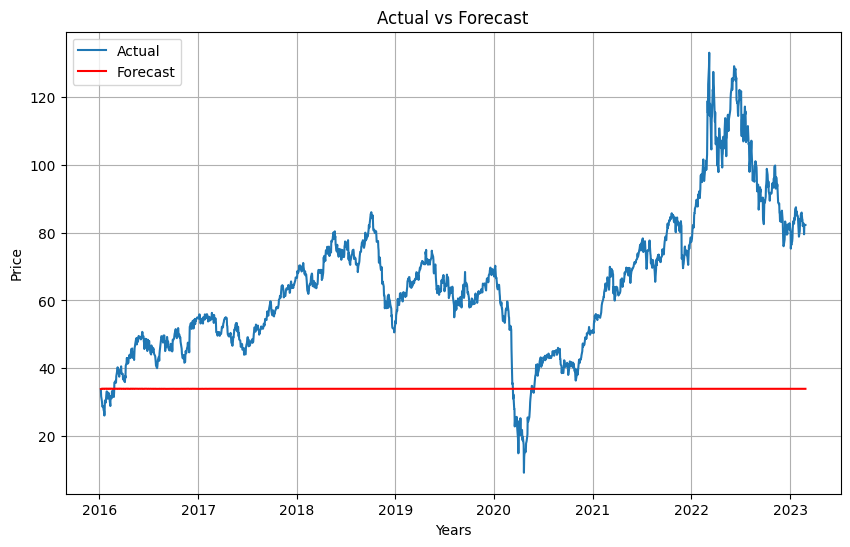

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'train_data' is your training set DataFrame

# Fit the ARIMA model
model = ARIMA(train_data['price'], order=(2, 1, 2))
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_data))

# Calculate Mean Squared Error
mse = mean_squared_error(test_data['price'], forecast)
print("Mean Squared Error:", mse)

# Plot the actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['price'], label='Actual')
plt.plot(test_data.index, forecast, color='red', label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 749.7159954193079


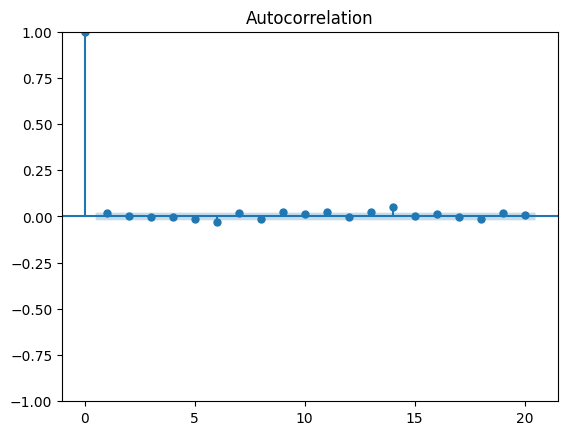

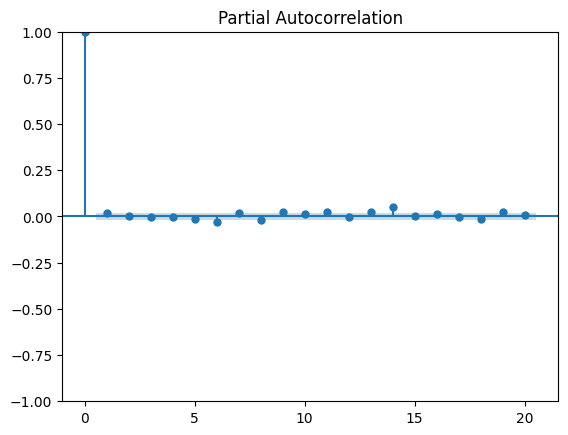

In [ ]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame containing the time series data
# Assuming 'best_params' contains the optimal ARIMA parameters

# Fit ARIMA model with optimal parameters
best_params = (2,1,2)
model = sm.tsa.ARIMA(df['price'], order=best_params)
final_model = model.fit()

# Optionally, perform diagnostic checks on the residuals
residuals = final_model.resid
# For example, you can plot the residuals to check for randomness
sm.graphics.tsa.plot_acf(residuals, lags=20)
sm.graphics.tsa.plot_pacf(residuals, lags=20)

# Validate the model's performance
# For example, calculate evaluation metrics
# For demonstration, we'll calculate MSE using the last part of the data as the test set
forecast = final_model.forecast(steps=len(test_data))
mse = mean_squared_error(test_data['price'], forecast)
print("Mean Squared Error:", mse)

# Make final adjustments or refinements to the model if necessary

# Optionally, save the final model for future use
final_model.save('final_arima_model.pkl')


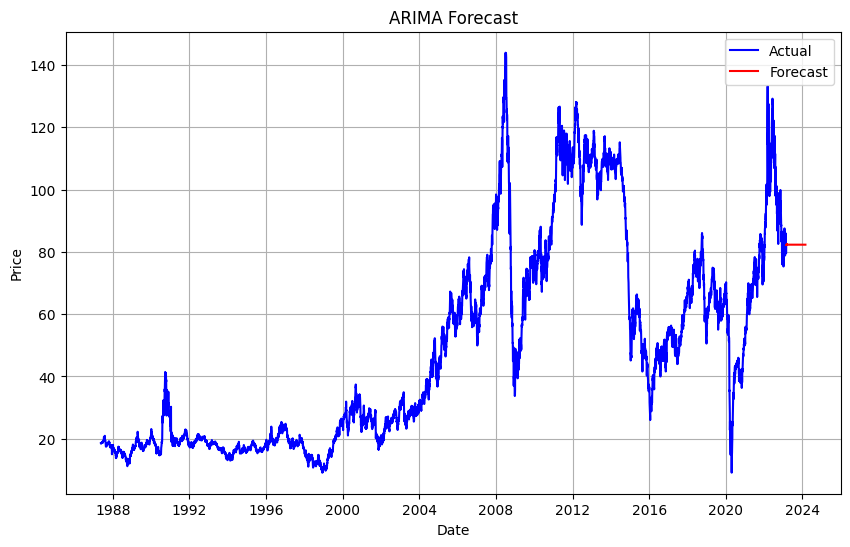

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the time series data
# Assuming 'final_model' is your final ARIMA model
# Assuming 'forecast_steps' is the number of forecast steps

# Plotting the complete dataset
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Actual', color='blue')

# Forecasting future values
forecast_steps=365
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, freq=df.index.freq)
forecast = final_model.forecast(steps=forecast_steps)
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Adding labels and legend
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Future Forecast: 9081    82.257310
9082    82.331405
9083    82.372110
9084    82.302343
9085    82.271979
9086    82.336983
9087    82.358512
9088    82.298531
9089    82.284467
9090    82.339312
9091    82.347145
9092    82.297431
Name: predicted_mean, dtype: float64


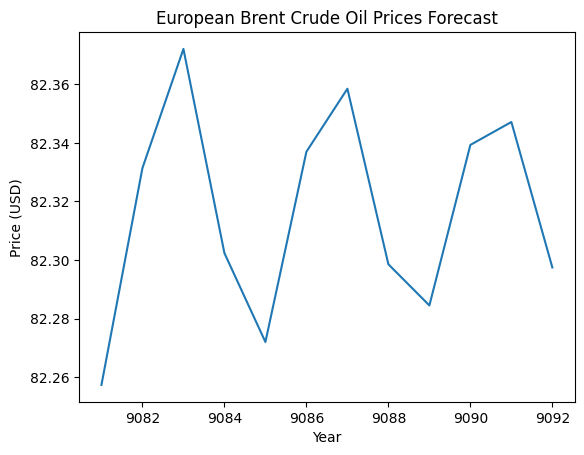

In [ ]:
# Fit the final ARIMA model using all available data
final_model = ARIMA(df, order=(2,1,2))  # You can use the optimal order you found
final_result = final_model.fit()

# Forecasting for future periods
future_forecast = final_result.forecast(steps=12)  # Forecasting the next 12 periods, adjust as needed

# Print the forecast
print("Future Forecast:", future_forecast)
plt.plot(future_forecast)
plt.title('European Brent Crude Oil Prices Forecast')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()

# *Sarima Model*

In [ ]:
from pmdarima import auto_arima

In [ ]:
train = df.iloc[:-31, :]
test = df.iloc[-31: , :]

In [ ]:
model = auto_arima(y=train.price,
                   m=7)

In [ ]:
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

In [ ]:
#Visualization
train['price']['2020-01-01':].plot(figsize = (12,8), legend = True)
test['price'].plot( legend = True)
predictions.plot(legend = True)

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['price'])
plt.title('Time Series Data')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [ ]:
# Check stationarity using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

In [ ]:
adf_test(df['price'])

In [ ]:
# If the time series is not stationary, apply differencing
df['diff'] = df['price'].diff().dropna()

In [ ]:
# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df['diff'])
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
df['diff'].fillna(method='bfill', inplace=True)

In [ ]:
# Check stationarity of the differenced series
adf_test(df['diff'])

In [ ]:
# Plot ACF and PACF to determine the orders (p, d, q) and (P, D, Q, s)
plot_acf(df['diff'])
plot_pacf(df['diff'])
plt.show()

In [ ]:
# Set the orders based on ACF and PACF plots
p, d, q = 1, 1, 1  # ARIMA orders
P, D, Q, s = 1, 1, 1, 12  # Seasonal orders

In [ ]:
# Fit SARIMA model
model = SARIMAX(df['price'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

In [ ]:
# Print the summary of the model
print(results.summary())

In [ ]:
# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

In [ ]:
# Get confidence intervals
conf_int = forecast.conf_int()

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Original Data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# **Prophet model**

In [ ]:
# Splitting the Data
train_data=df.head(7081)
test_data=df.tail(2000)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data_p = train_data.reset_index().rename(columns={'date':'ds','price':'y'})

In [ ]:
train_data_p

In [ ]:
from prophet import Prophet

In [ ]:
%%time
model = Prophet()
model.fit(train_data_p)

In [ ]:
test_data_p = test_data.reset_index().rename(columns={'date':'ds','price':'y'})

In [ ]:
ypred = model.predict(test_data_p)

In [ ]:
ypred.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(ypred, ax=ax)
plt.show()

In [ ]:
fig = model.plot_components(ypred)